In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# %matplotlib inline

# experiment: dataset size vs accuracy

In [2]:
experiment_name = "title_and_description"

In [3]:
results = pd.read_csv(f"../results/{experiment_name}.csv")

In [4]:
results.shape

(10, 26)

In [5]:
results

,N,num_train_classes,num_test_classes,mean_num_samples_per_class,median_num_samples_per_class,train_accuracy,std_train_accuracy,val_accuracy,std_val_accuracy,test_accuracy,...,std_train_f1_macro,val_f1_macro,std_val_f1_macro,test_f1_macro,model__C,vectorizer__max_features,vectorizer__ngram_range,min_samples_per_class,representation_score,representation_score_threshold
0,1000,22,22,45.454545,28.5,0.617004,0.011178,0.488974,0.021439,0.485416,...,0.019734,0.246035,0.031182,0.309800,1,500,"(1, 2)",0,0.98,10
1,2000,22,22,90.909091,55.5,0.670003,0.015854,0.565008,0.017158,0.533927,...,0.031799,0.405224,0.019403,0.364390,1,500,"(1, 2)",0,1.00,10
2,3000,22,22,136.363636,74.0,0.732833,0.005949,0.635667,0.010530,0.579982,...,0.005013,0.511332,0.003135,0.493327,1,1000,"(1, 2)",0,1.00,10
3,4000,22,22,181.818182,110.5,0.732126,0.004482,0.648750,0.008887,0.590421,...,0.014241,0.536799,0.021890,0.506998,1,500,"(1, 1)",0,1.00,10
4,5000,22,22,227.272727,146.0,0.745901,0.005861,0.659201,0.009150,0.610378,...,0.005549,0.573234,0.015624,0.546932,1,1000,"(1, 2)",0,1.00,10
5,6000,22,22,272.727273,161.0,0.748917,0.006056,0.675833,0.009877,0.610071,...,0.014288,0.583433,0.012822,0.543799,1,1000,"(1, 2)",0,1.00,10
6,7000,22,22,318.181818,194.0,0.798643,0.004857,0.701857,0.001416,0.642309,...,0.012053,0.605024,0.011580,0.585017,1,2000,"(1, 1)",0,1.00,10
7,8000,22,22,363.636364,229.5,0.808562,0.003572,0.710124,0.006673,0.651520,...,0.002710,0.617879,0.009998,0.598294,1,5000,"(1, 2)",0,1.00,10
8,9000,22,22,409.090909,249.5,0.816556,0.000671,0.725556,0.004871,0.656432,...,0.000634,0.647883,0.010296,0.600851,1,5000,"(1, 2)",0,1.00,10
9,10000,22,22,454.545455,269.0,0.820000,0.003388,0.734001,0.009249,0.664108,...,0.005828,0.655158,0.017650,0.610121,1,5000,"(1, 2)",0,1.00,10


## Analyse data set size vs accuracy

/home/skarasik/anaconda3/envs/dynamic_pipeline/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/skarasik/anaconda3/envs/dynamic_pipeline/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/skarasik/anaconda3/envs/dynamic_pipeline/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


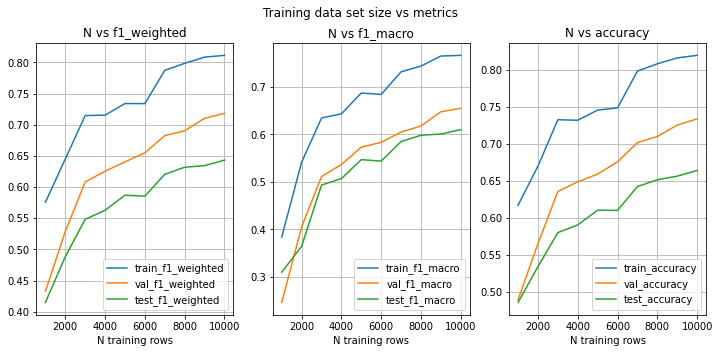

In [6]:
def plot_metric(results: pd.DataFrame, metric_name: str, ax: plt.Axes = None) -> plt.Axes:
    prefixes = ["train", "val", "test"]
    columns = [f"{prefix}_{metric_name}" for prefix in prefixes]
    ax = results.set_index("N")[columns].plot(title=f"N vs {metric_name}", ax=ax)
    ax.set_xlabel("N training rows")
    ax.grid()
    return ax

metric_names = ["f1_weighted", "f1_macro", "accuracy"]
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharex=True)
fig.suptitle("Training data set size vs metrics")
for i, metric_name in enumerate(metric_names):
    plot_metric(results, metric_name, axes[i])

* metrics grow almost linearly with N increasing
* there is significant overfitting

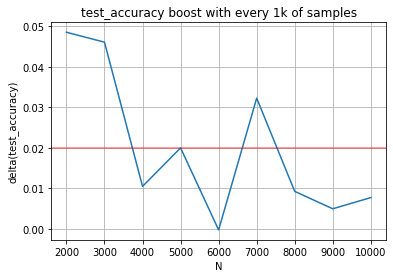

In [16]:
df = results.set_index("N")["test_accuracy"].diff(1)
df.plot(title="test_accuracy boost with every 1k of samples")
plt.axhline(df.mean(), c="red", alpha=0.5)
plt.ylabel("delta(test_accuracy)")
plt.grid()

fig = plt.gcf()

In [17]:
average_boost = results.set_index("N")["test_accuracy"].diff(1).mean()
print(f"On average, every 1k samples adds {int(round(average_boost * 100))}% of accuracy")

On average, every 1k samples adds 2% of accuracy


In [18]:
fig.savefig("../plots/N_vs_accuracy_boost.png")

## Analyse number of features vs number of rows

<AxesSubplot:xlabel='N'>

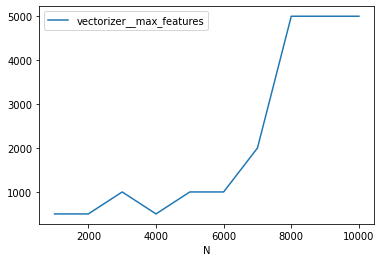

In [12]:
results.plot("N", "vectorizer__max_features")

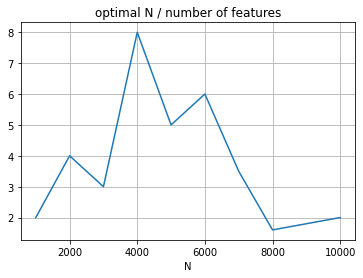

In [15]:
foo = (results["N"] / results["vectorizer__max_features"])
foo.index = results["N"]
foo.plot(title="optimal N / number of features")
plt.grid()

fig = plt.gcf()

In [11]:
n_features_per_record = (results["N"] / results["vectorizer__max_features"]).mean()
print(f"seems that {round(n_features_per_record)} is the optimal ratio for `number of rows / number of features`")

seems that 4 is the optimal ratio for `number of rows / number of features`


In [19]:
fig.savefig("../plots/N_vs_max_features.png")